**DATA LOADING**

In [ ]:
from google.colab import files
uploaded = files.upload()

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "Maternal_Health_Risk_Dataset.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows
print("\nDataset Preview:")
(df.head())

Saving Maternal_Health_Risk_Dataset.csv to Maternal_Health_Risk_Dataset (2).csv

Dataset Preview:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,20,110,60,7.0,100.0,70,mid risk
1,15,120,80,7.2,98.0,70,low risk
2,31,120,60,6.1,98.0,76,low risk
3,34,85,60,11.0,102.0,86,high risk
4,13,90,65,7.9,101.0,80,mid risk


**DATA CLEANING**

In [ ]:
# Dataset information
print("Dataset Information:")
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Summary statistics of the dataset
print("\nSummary Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1218 non-null   int64  
 1   SystolicBP   1218 non-null   int64  
 2   DiastolicBP  1218 non-null   int64  
 3   BS           1218 non-null   float64
 4   BodyTemp     1218 non-null   float64
 5   HeartRate    1218 non-null   int64  
 6   RiskLevel    1218 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 66.7+ KB

Missing Values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Summary Statistics:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,29.836617,114.620690,77.678982,9.145312,98.765517,74.799672
std,13.291266,18.769868,14.228199,3.597587,1.464427,8.311871
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,28.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,11.000000,98.000000,80.000000
max,65.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
# Check the class distribution
df['RiskLevel'].value_counts()

,count
RiskLevel,
mid risk,406
low risk,406
high risk,406


In [ ]:
# Encode the categorical variable to numerical values as follows: High risk-2, mid risk-1, low risk- 0
df["RiskLevel"] = df["RiskLevel"].replace({"high risk": 2, "mid risk": 1, "low risk": 0})

# Display table with encoded values
df.head()

<ipython-input-45-d12a738ae8b4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["RiskLevel"] = df["RiskLevel"].replace({"high risk": 2, "mid risk": 1, "low risk": 0})


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,20,110,60,7.0,100.0,70,1
1,15,120,80,7.2,98.0,70,0
2,31,120,60,6.1,98.0,76,0
3,34,85,60,11.0,102.0,86,2
4,13,90,65,7.9,101.0,80,1


**DATA VISUALIZATIONS**

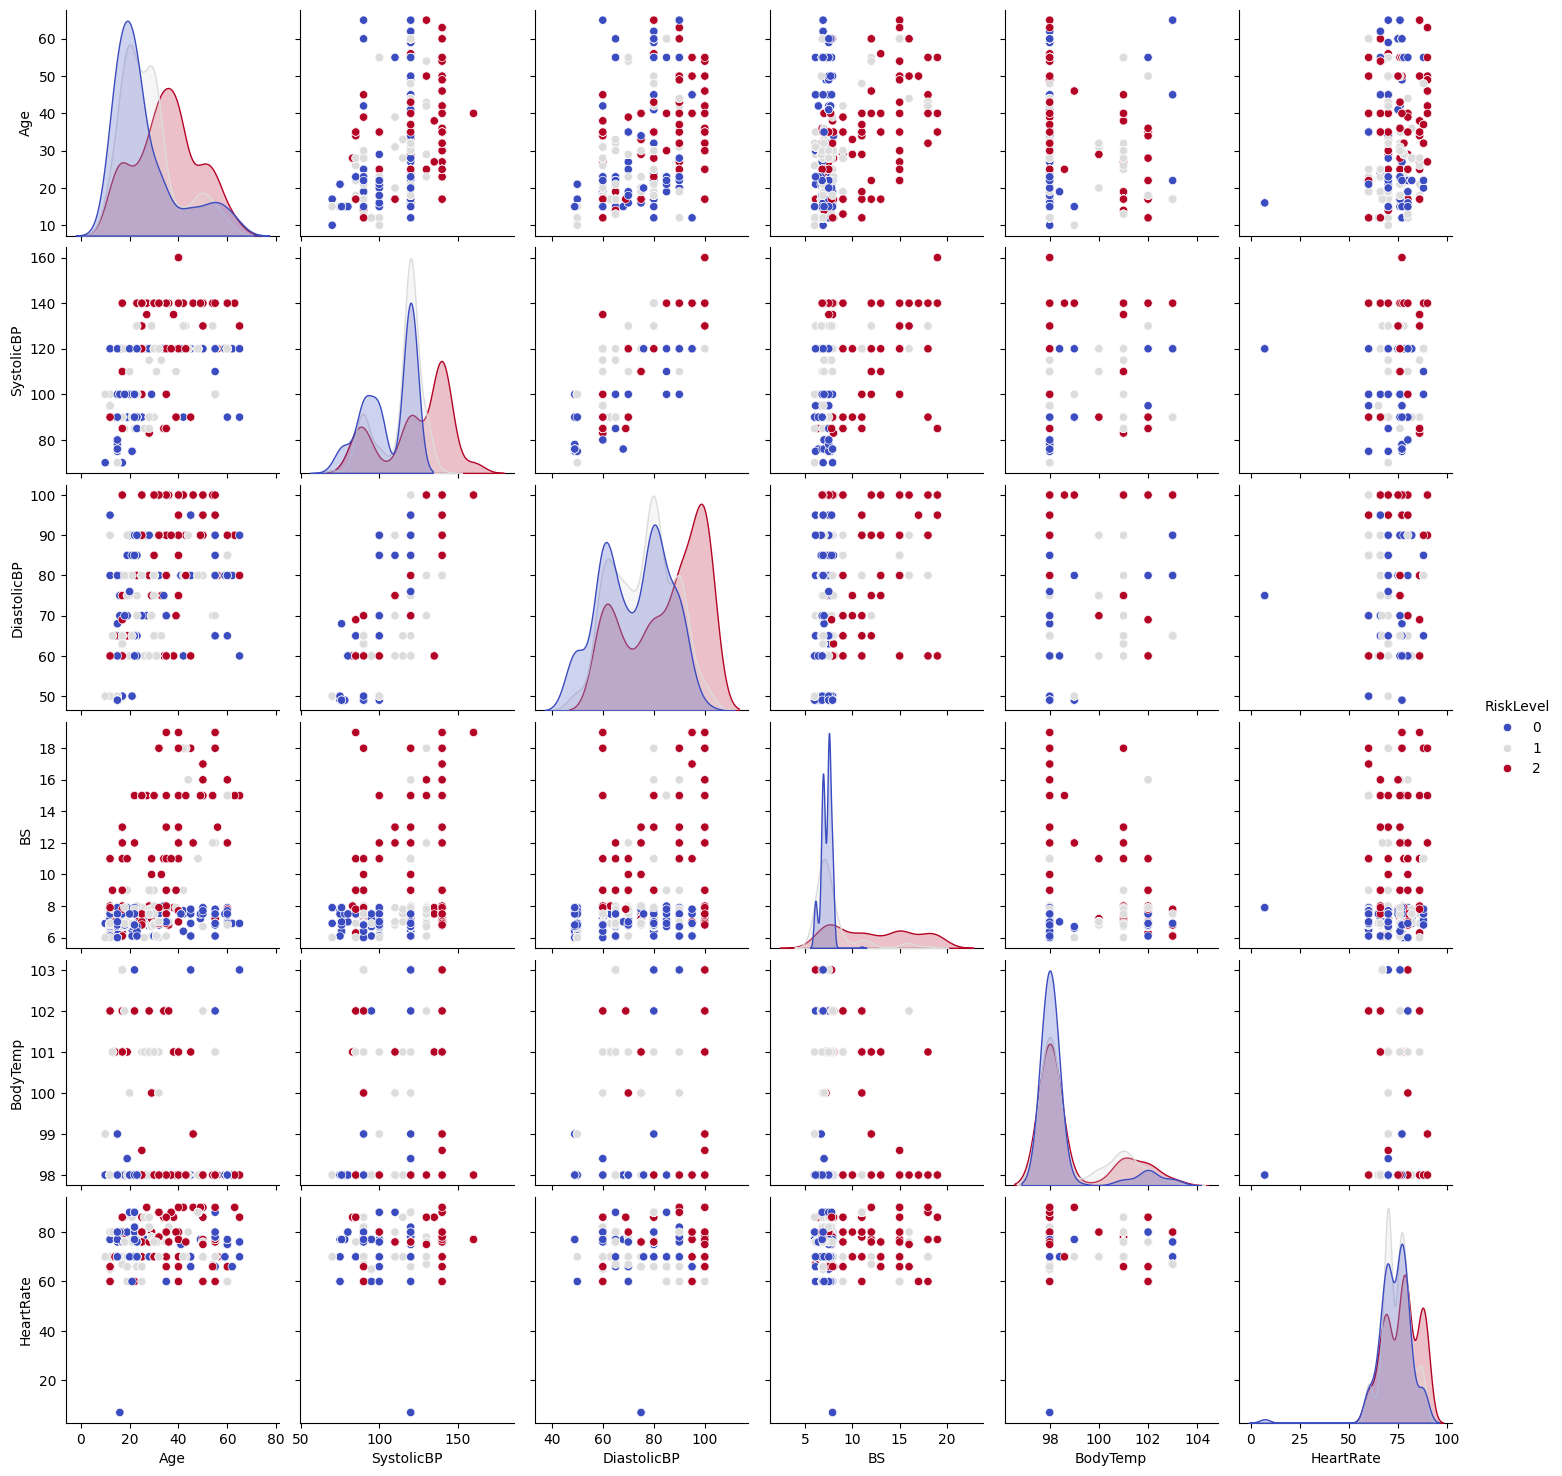

In [ ]:
# Using pairplot to explore relationships between features
sns.pairplot(df, hue = "RiskLevel", palette = "coolwarm", diag_kind = "kde", height = 2.5)
plt.show()

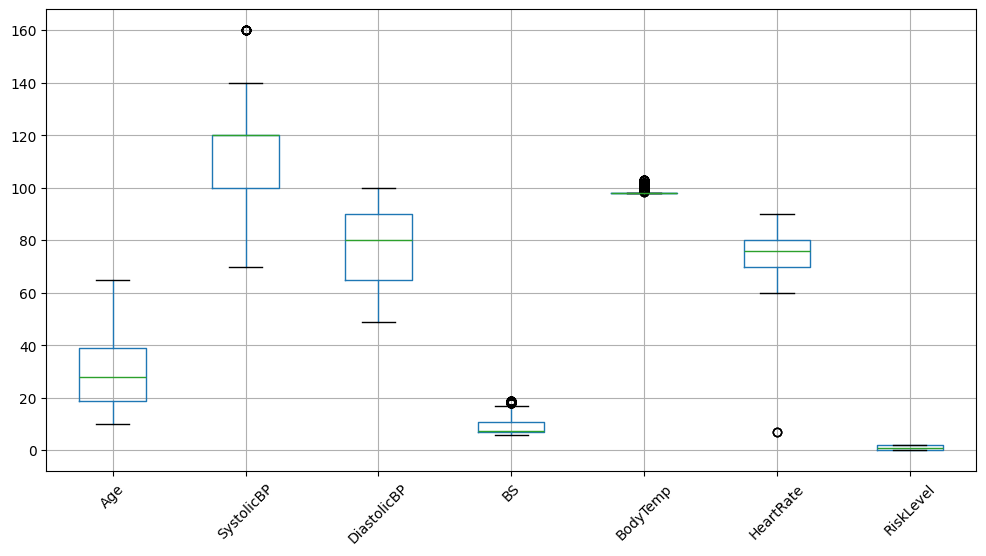

In [ ]:
# Plot boxplots to check for outliers
plt.figure(figsize = (12,6))
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

* From the box plots, there are some outliers in the various features. So we will use capping with the IQR method to handle them, in the data pre-processing stage.

* This method involves limiting extreme values (outliers) to a certain threshold rather than removing them. This way we will not lose any of our data and thus model performance will not be affected.

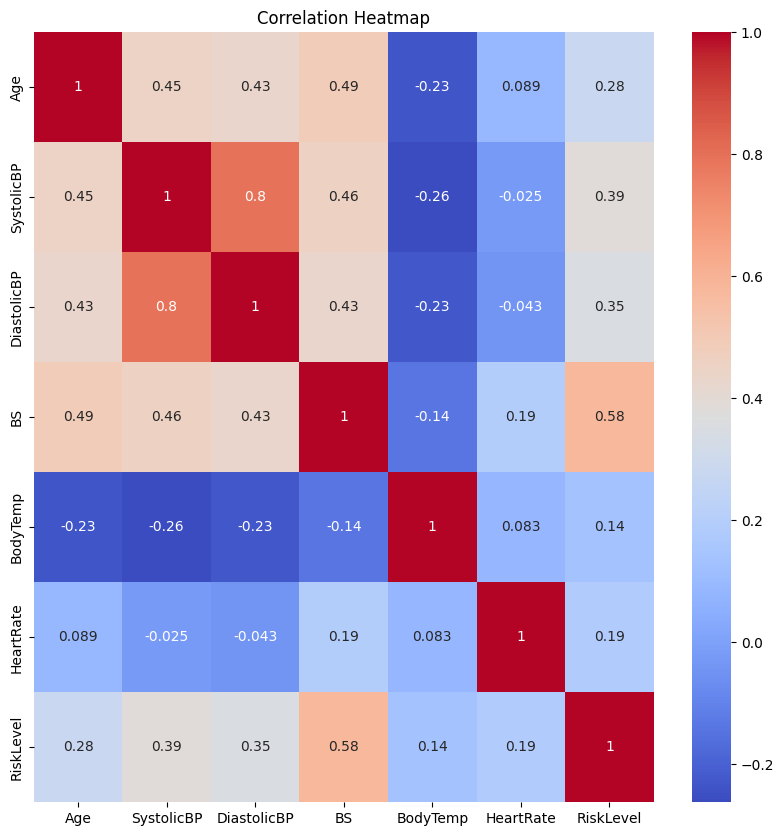

In [ ]:
# Using Correlation heatmap to see the relations among all features
correlation_matrix = df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* There is a positive correlation between the input variables and the output variables.

* The strongest one is in Blood Sugar with 0.58. Body temperature and Heart rate are the weakest with 0.14 and 0.18 respectively.

* Stystolic BP and Diastolic BP are strongly correlated with value of 0.8. As Systolic BP increases, Diastolic BP also tends to increase.

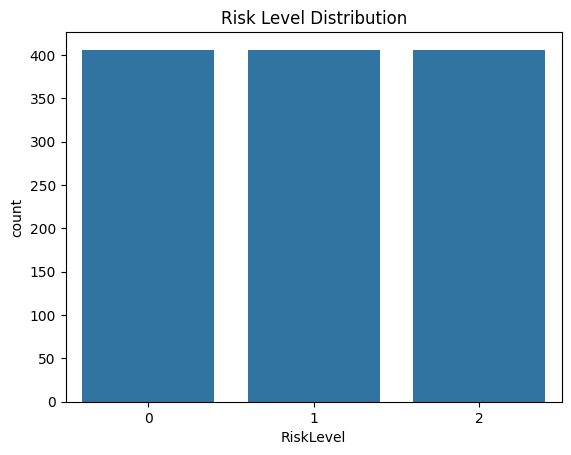

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x = df["RiskLevel"])
plt.title("Risk Level Distribution")
plt.show()

From our dataset, it is clear that there is a balance between all the classes, so this will make it easier to go ahead and build our model.

**DATA PRE-PROCESSING**

In [ ]:
# Handle outliers by capping with the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df.copy()

# Cap the outliers
for column in df.columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    df_no_outliers[column] = np.where(df[column] < lower_bound, lower_bound, df_no_outliers[column])
    df_no_outliers[column] = np.where(df[column] > upper_bound, upper_bound, df_no_outliers[column])

# Inspect the dataset after handling outliers
print("\nDataset after handling outliers:")
df_no_outliers.describe()


Dataset after handling outliers:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.0,1218.000000,1218.000000
mean,29.836617,114.481117,77.678982,9.056314,98.0,74.917898,1.000000
std,13.291266,18.466387,14.228199,3.372947,0.0,7.662123,0.816832
min,10.000000,70.000000,49.000000,6.000000,98.0,55.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.0,70.000000,0.000000
50%,28.000000,120.000000,80.000000,7.500000,98.0,76.000000,1.000000
75%,39.000000,120.000000,90.000000,11.000000,98.0,80.000000,2.000000
max,65.000000,150.000000,100.000000,17.150000,98.0,90.000000,2.000000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_no_outliers.drop('RiskLevel', axis = 1)
y = df_no_outliers['RiskLevel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Further split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

# Check the shapes of the splits
print("\nTraining Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (779, 6)
Validation Set Shape: (195, 6)
Test Set Shape: (244, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data shapes
print("\nScaled Data Shapes:")
print("Training Data:", X_train_scaled.shape)
print("Validation Data:", X_val_scaled.shape)
print("Test Data:", X_test_scaled.shape)


Scaled Data Shapes:
Training Data: (779, 6)
Validation Data: (195, 6)
Test Data: (244, 6)


**BUILDING THE MODEL - RANDOM FOREST CLASSIFIER**

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Model Performance Summary:
Training Accuracy: 0.9255
Validation Accuracy: 0.8974
Test Accuracy: 0.9016

Validation Log Loss: 0.2573
Test Log Loss: 0.2636

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.94        81
         1.0       0.87      0.84      0.86        81
         2.0       0.88      0.95      0.91        82

    accuracy                           0.90       244
   macro avg       0.90      0.90      0.90       244
weighted avg       0.90      0.90      0.90       244



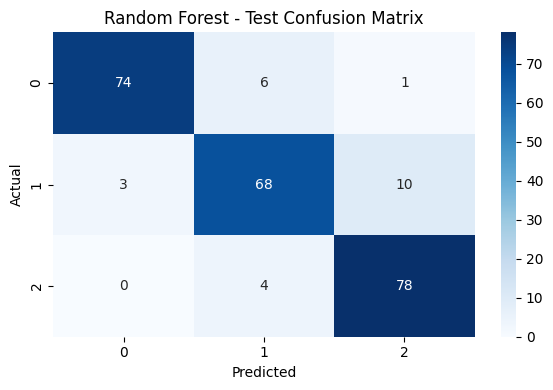

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

# Bulding the model with hyperparameter tuning
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Run GridSearchCV
grid_search = GridSearchCV(
    estimator = RandomForestClassifier(random_state = 42),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate performance with best model
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train_scaled))
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nModel Performance Summary:")
print("Training Accuracy: {:.4f}".format(train_accuracy))
print("Validation Accuracy: {:.4f}".format(val_accuracy))
print("Test Accuracy: {:.4f}".format(test_accuracy))

# Loss
y_val_proba = best_model.predict_proba(X_val_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)

val_logloss = log_loss(y_val, y_val_proba)
test_logloss = log_loss(y_test, y_test_proba)

print("\nValidation Log Loss: {:.4f}".format(val_logloss))
print("Test Log Loss: {:.4f}".format(test_logloss))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, zero_division = 1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Random Forest - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**SAVING THE MODEL**

In [ ]:
import joblib

# Save the trained RandomForest model
joblib.dump(best_model, "random_forest_maternal_health.pkl")

# Save the scaler separately (if you used one)
joblib.dump(scaler, "scaler.pkl")

print("RandomForest model and scaler saved successfully!")


RandomForest model and scaler saved successfully!


**TESTING THE MODEL**

In [ ]:
import numpy as np
import pandas as pd
import joblib

# Load the trained model and scaler
def load_model(model_path = "random_forest_maternal_health.pkl", scaler_path = "scaler.pkl"):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    print("Model and scaler loaded successfully!")
    return model, scaler

# Prediction function - takes feature values as inputs and predicts the risk level
def make_prediction(model, scaler, age, systolic_bp, diastolic_bp, blood_sugar, body_temp, heart_rate):
    # Feature names as per your dataset
    feature_names = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]

    # Create a list with the input values in the same order as feature_names
    sample = [age, systolic_bp, diastolic_bp, blood_sugar, body_temp, heart_rate]

    # Convert input list to DataFrame
    sample_df = pd.DataFrame([sample], columns = feature_names)

    # Apply scaling
    sample_scaled = scaler.transform(sample_df)

    # Make prediction
    predicted_risk_numeric = model.predict(sample_scaled)[0]

    # Convert numerical prediction to label
    risk_mapping = {0: "low risk", 1: "mid risk", 2: "high risk"}
    predicted_risk_label = risk_mapping[predicted_risk_numeric]

    return predicted_risk_label

if __name__ == "__main__":
    # Load model and scaler
    model, scaler = load_model()

    # Test out with some input values for the prediction (you can use any values you wish)
    predicted_risk = make_prediction(
        model, scaler,
        age = 25,
        systolic_bp = 120,
        diastolic_bp = 80,
        blood_sugar = 6.5,
        body_temp = 100,
        heart_rate = 75
    )

    print(f"Predicted Risk Level: {predicted_risk}")

Model and scaler loaded successfully!
Predicted Risk Level: low risk
